In [1]:
import numpy as np
import copy as cp
import matplotlib as mt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
import matplotlib.pyplot as plt
import pyemma.plots as mplt 
import pyemma
import pickle as pkl
import sklearn as skl
import sklearn.metrics as mtr
import scipy as sc
import sys
from tqdm import tqdm

In [2]:
sys.path.append('../0_python_modules/')

In [3]:
import proximity_matrix as pmt
import extras
import navjeet_hist as nh

In [4]:
randoms = np.loadtxt('../1_datasets/randoms.txt', dtype=int)

In [5]:
dists = np.loadtxt(f'traj_specific_data/distances0.xvg', comments=['@','#'], usecols=[3])

weights = np.where(dists < 0.6)[0].shape[0]/dists.shape[0]

In [6]:
weights

0.06585091371181798

In [21]:
hdirect = np.load('saved_direct/tlag_700_hist.npy')[0]
hsupervised = [np.load(f'saved_supervised/tlags/hist_{i}_700.npy')[0] for i in range(5)]
hpermute = [
    [
        np.load(f'saved_furf/tlags/hist_{h}_{i}_700.npy')[0]
    for i in range(5)]
for h in range(2,11)]

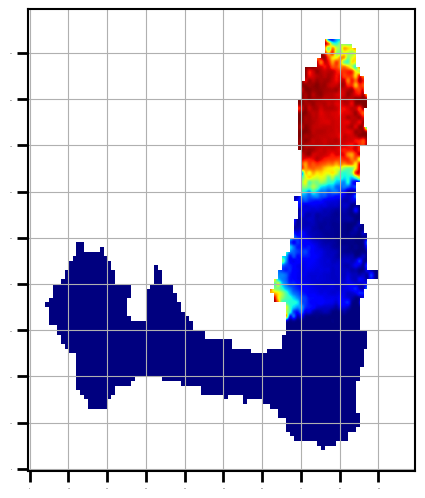

In [92]:
fig,ax = plt.subplots(1,figsize=(5,6))
#
ax.set_xticks(np.arange(0,100,10))
ax.set_yticks(np.arange(0,100,10))
ax.grid()
#
ax.spines[:].set_linewidth(1.5)
ax.tick_params(length=8, width=2, labelsize=0)
h, r = 0, 0
ax.imshow(hpermute[h][r].T, 
          aspect='auto', origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
plt.savefig(f'plots/binned.png', transparent=True)
plt.show()

## parameters

/tmp/ipykernel_1055507/701804521.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mt.cm.get_cmap('Reds')


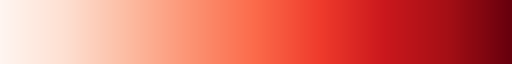

In [13]:
cmap = mt.cm.get_cmap('Reds')
cmap

### cutoff

In [43]:
cutoffs = np.arange(0.01,0.51,0.01)
#
cdirect = np.zeros((len(cutoffs)))
csupervised = np.zeros((len(cutoffs),len(hsupervised)))
cpermute = np.zeros((len(cutoffs), len(hpermute), len(hpermute[0])))
#
for a,c in enumerate(cutoffs):
    cdirect[a] = nh.classification_extent(hdirect, cutoff=c, strategy='weighted',
                                         output_type='jm', operation=2, 
                                         jm_lower=weights, jm_impure=0.44)
    
    for h in range(2,11):
        
        for i in range(5):
            
            cpermute[a,h-2,i] = nh.classification_extent(hpermute[h-2][i], cutoff=c, strategy='weighted',
                                                         output_type='jm', operation=2, 
                                                         jm_lower=weights, jm_impure=0.44)
            
            if h==2:
                csupervised[a,i] = nh.classification_extent(hsupervised[i], cutoff=c, strategy='weighted',
                                                         output_type='jm', operation=2, 
                                                         jm_lower=weights, jm_impure=0.44)
                
csupervised = np.mean(csupervised, axis=1), np.std(csupervised, axis=1)
cpermute = np.mean(cpermute, axis=2), np.std(cpermute, axis=2)

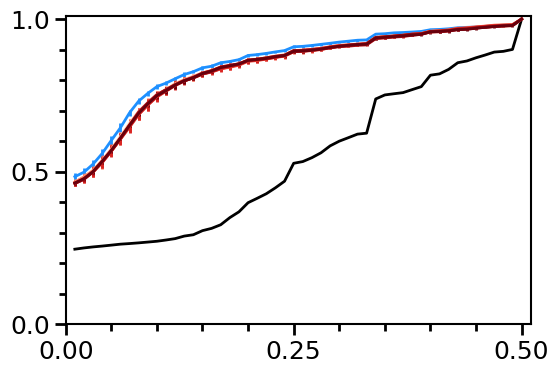

In [59]:
fig,ax = plt.subplots(1,figsize=(6,4))
ax.spines[:].set_linewidth(1.5)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='minor', length=5, width=2)
ax.set_ylim(0,1.01)
ax.set_yticks([0,0.5,1])
ax.set_xlim(0,0.51)
ax.set_xticks([0,0.25,0.5])
#
ax.plot(cutoffs, cdirect, color='black', lw=2)
ax.errorbar(cutoffs, csupervised[0], yerr=csupervised[1], color='dodgerblue', lw=2)
for h in range(2,11):
    ax.errorbar(cutoffs, cpermute[0][:,h-2], yerr=cpermute[1][:,h-2], color=cmap(h/10), lw=2)
#
plt.savefig(f'plots/cutoff.pdf')
plt.show()

### w_imp

In [69]:
wimps = np.arange(0.01,1,0.01)
#
cdirect = np.zeros((len(wimps)))
csupervised = np.zeros((len(wimps),len(hsupervised)))
cpermute = np.zeros((len(wimps), len(hpermute), len(hpermute[0])))
#
for a,wimp in enumerate(wimps):
    cdirect[a] = nh.classification_extent(hdirect, cutoff=0.1, strategy='weighted',
                                         output_type='jm', operation=2, 
                                         jm_lower=weights, jm_impure=wimp)
    
    for h in range(2,11):
        
        for i in range(5):
            
            cpermute[a,h-2,i] = nh.classification_extent(hpermute[h-2][i], cutoff=0.1, strategy='weighted',
                                                         output_type='jm', operation=2, 
                                                         jm_lower=weights, jm_impure=wimp)
            
            if h==2:
                csupervised[a,i] = nh.classification_extent(hsupervised[i], cutoff=0.1, strategy='weighted',
                                                         output_type='jm', operation=2, 
                                                         jm_lower=weights, jm_impure=wimp)
                
csupervised = np.mean(csupervised, axis=1), np.std(csupervised, axis=1)
cpermute = np.mean(cpermute, axis=2), np.std(cpermute, axis=2)

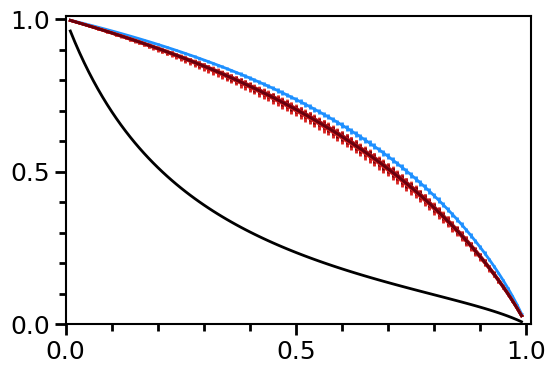

In [63]:
fig,ax = plt.subplots(1,figsize=(6,4))
ax.spines[:].set_linewidth(1.5)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='minor', length=5, width=2)
ax.set_ylim(0,1.01)
ax.set_yticks([0,0.5,1])
ax.set_xlim(0,1.01)
ax.set_xticks([0,0.5,1])
#
ax.plot(wimps, cdirect, color='black', lw=2)
ax.errorbar(wimps, csupervised[0], yerr=csupervised[1], color='dodgerblue', lw=2)
for h in range(2,11):
    ax.errorbar(wimps, cpermute[0][:,h-2], yerr=cpermute[1][:,h-2], color=cmap(h/10), lw=2)
#
plt.savefig(f'plots/wimp.pdf')
plt.show()

In [70]:
cutoffs[np.argmax(csupervised[0]-cdirect)]

0.44

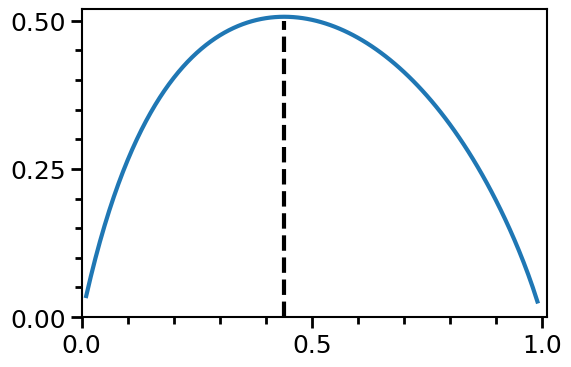

In [94]:
fig,ax = plt.subplots(1,figsize=(6,4))
ax.spines[:].set_linewidth(1.5)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='minor', length=5, width=2)
ax.set_ylim(0,0.52)
ax.set_yticks([0,0.25,0.5])
ax.set_xlim(0,1.01)
ax.set_xticks([0,0.5,1])
#
ax.plot(wimps, csupervised[0]-cdirect, lw=3)
ax.vlines(0.44,0,0.5, linestyle='--', color='black', lw=3)
#
plt.savefig(f'plots/wimp_difference.pdf')
plt.show()

### w_l

In [66]:
wls = np.arange(0.01,1,0.01)
#
cdirect = np.zeros((len(wls)))
csupervised = np.zeros((len(wls),len(hsupervised)))
cpermute = np.zeros((len(wls), len(hpermute), len(hpermute[0])))
#
for a,wl in enumerate(wls):
    cdirect[a] = nh.classification_extent(hdirect, cutoff=0.1, strategy='weighted',
                                         output_type='jm', operation=2, 
                                         jm_lower=wl, jm_impure=0.44)
    
    for h in range(2,11):
        
        for i in range(5):
            
            cpermute[a,h-2,i] = nh.classification_extent(hpermute[h-2][i], cutoff=0.1, strategy='weighted',
                                                         output_type='jm', operation=2, 
                                                         jm_lower=wl, jm_impure=0.44)
            
            if h==2:
                csupervised[a,i] = nh.classification_extent(hsupervised[i], cutoff=0.1, strategy='weighted',
                                                         output_type='jm', operation=2, 
                                                         jm_lower=wl, jm_impure=0.44)
                
csupervised = np.mean(csupervised, axis=1), np.std(csupervised, axis=1)
cpermute = np.mean(cpermute, axis=2), np.std(cpermute, axis=2)

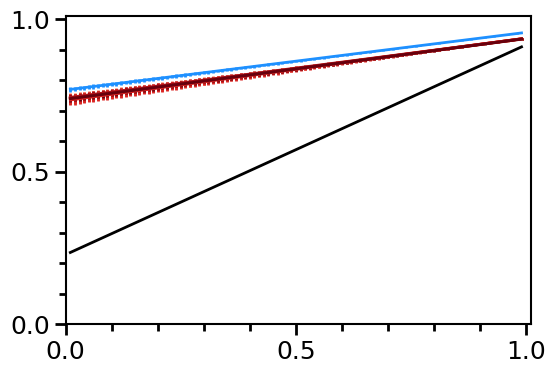

In [68]:
fig,ax = plt.subplots(1,figsize=(6,4))
ax.spines[:].set_linewidth(1.5)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='minor', length=5, width=2)
ax.set_ylim(0,1.01)
ax.set_yticks([0,0.5,1])
ax.set_xlim(0,1.01)
ax.set_xticks([0,0.5,1])
#
ax.plot(wls, cdirect, color='black', lw=2)
ax.errorbar(wls, csupervised[0], yerr=csupervised[1], color='dodgerblue', lw=2)
for h in range(2,11):
    ax.errorbar(wls, cpermute[0][:,h-2], yerr=cpermute[1][:,h-2], color=cmap(h/10), lw=2)
#
plt.savefig(f'plots/wl.pdf')
plt.show()